<a href="https://colab.research.google.com/github/alexandra2608/cs102/blob/homework07/Python%2C_%D0%A8%D0%B0%D0%B4%D1%80%D0%B8%D0%BD%D0%B0%2C_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_22_23_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [1]:
from pandas.io.common import dataclasses
import pandas as pd

# загрузка датасета и выбор 20 тысяч случайных строк
data = pd.read_csv('music_genre.csv').sample(n=20000, random_state=42)

# удаление дублирующихся строк
dataclasses = data.drop_duplicates()

# удаление строк с artist_name = 'empty_field'
empty_artist = data.loc[data['artist_name'] == 'empty_field']
if not empty_artist.empty:
    print(f"Найдено {empty_artist.shape[0]} строк с пустыми именами артистов:")
    print(empty_artist)
    data = data.drop(empty_artist.index)

# проверка на наличие дубликатов и строк с artist_name = 'empty_field'
print(data.duplicated().sum())  
print(data['artist_name'].eq('empty_field').sum())

Найдено 975 строк с пустыми именами артистов:
       instance_id  artist_name  \
13723      60374.0  empty_field   
4413       50192.0  empty_field   
13167      57532.0  empty_field   
19193      46528.0  empty_field   
4729       48312.0  empty_field   
...            ...          ...   
4184       85664.0  empty_field   
18860      89548.0  empty_field   
36273      79279.0  empty_field   
12709      32212.0  empty_field   
19328      40629.0  empty_field   

                                              track_name  popularity  \
13723                                          Unchained        49.0   
4413                                       Sweet Harmony        62.0   
13167                                    bioluminescence         2.0   
19193                                        The Morning        46.0   
4729                                              Geisha        36.0   
...                                                  ...         ...   
4184                         

### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

Electronic     0.102923
Anime          0.101924
Rap            0.100662
Hip-Hop        0.100347
Blues          0.099611
Jazz           0.099138
Alternative    0.099085
Classical      0.099085
Country        0.098665
Rock           0.098560
Name: music_genre, dtype: float64


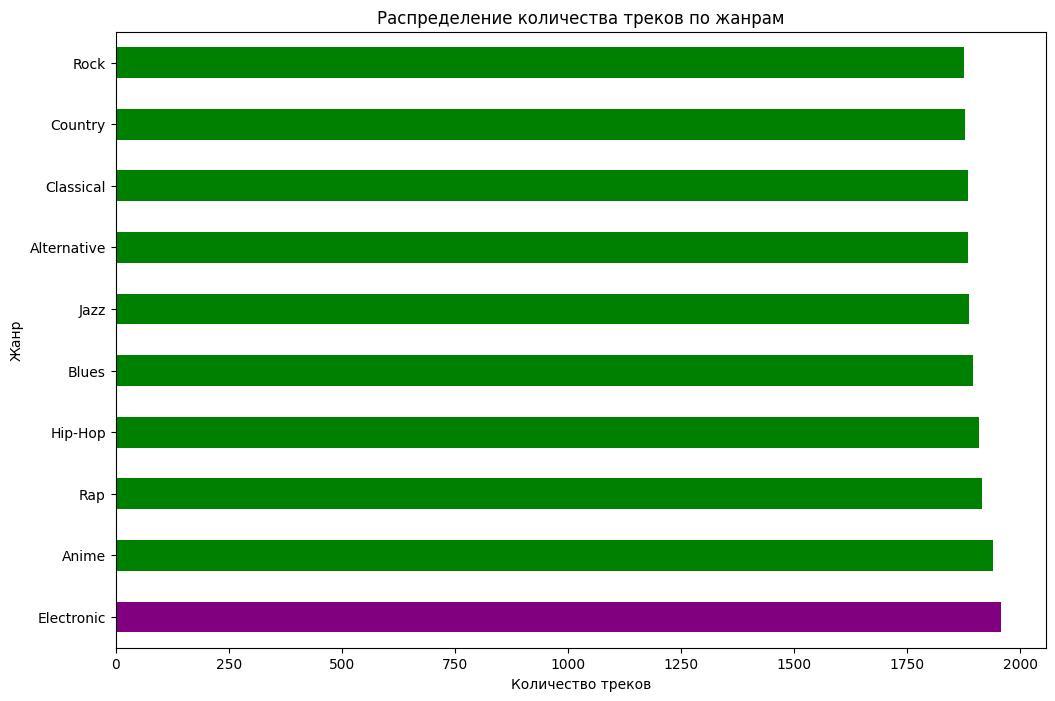

Самый танцевальный жанр: Hip-Hop


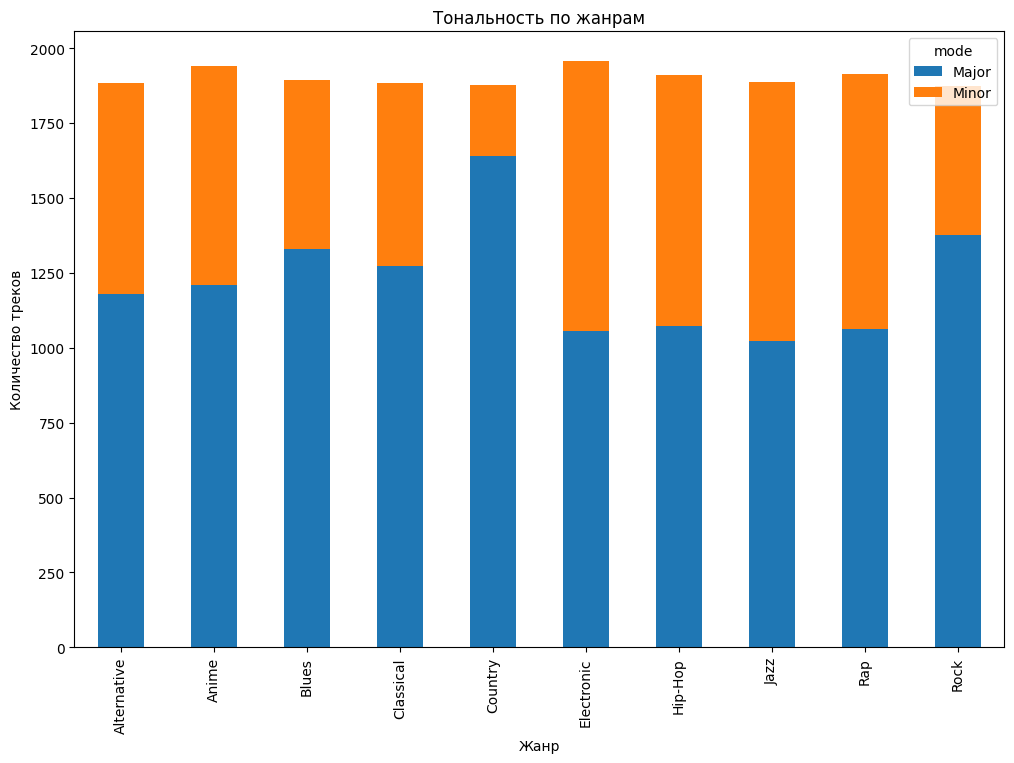

In [2]:
import matplotlib.pyplot as plt

# Доля каждого жанра в дф
segment = data['music_genre'].value_counts(normalize=True)
print(segment)

# Распределение количества треков по жанрам на столбиковой диаграмме
plt.figure(figsize=(12, 8))
max = data['music_genre'].value_counts().plot(kind='barh', color='green')
max.patches[0].set_facecolor('purple')  # выделение жанра с максимальным количеством треков
plt.xlabel('Количество треков')
plt.ylabel('Жанр')
plt.title('Распределение количества треков по жанрам')
plt.show()

# Самый танцевальный жанр
danceability = data.groupby('music_genre')['danceability'].mean()
most_danceable = danceability.idxmax()
print(f"Самый танцевальный жанр: {most_danceable}")

# Тональность по жанрам
major_or_minor = data.groupby(['music_genre', 'mode'])['track_name'].count().unstack()
major_or_minor.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Жанр')
plt.ylabel('Количество треков')
plt.title('Тональность по жанрам')
plt.show()

### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

Исполнитель с наибольшим количеством треков: Nobuo Uematsu
Количество треков: 185
Исполнитель с наименьшим количеством треков: Jerry Lee Lewis
Количество треков: 1


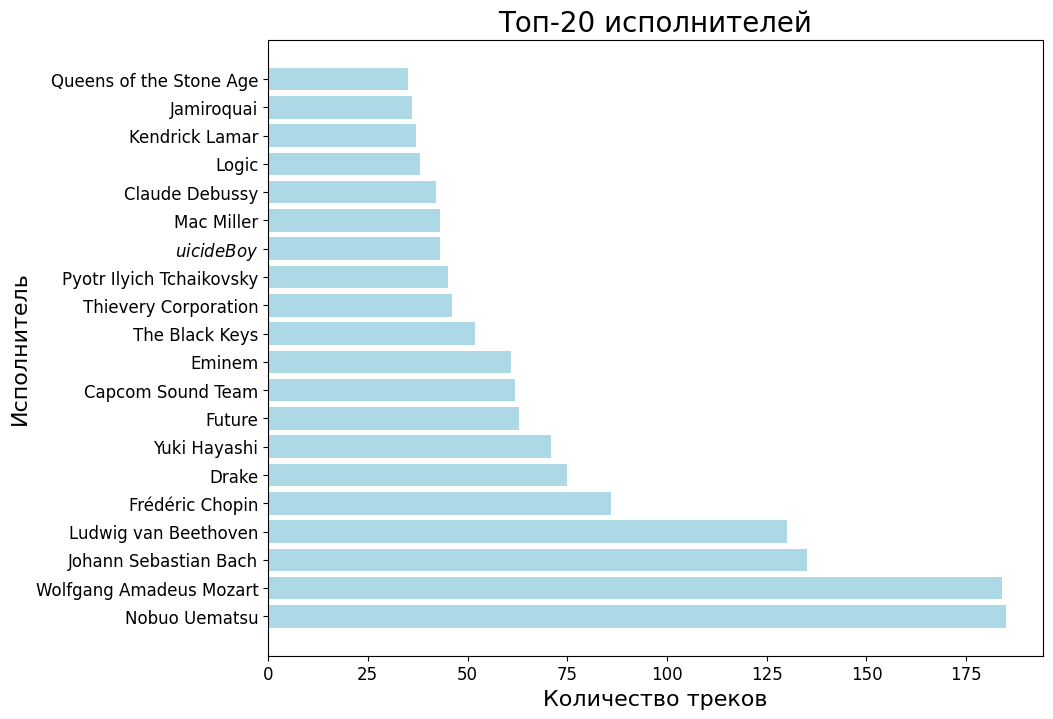

In [3]:
import matplotlib.pyplot as plt
# Исполнитель с наибольшим и наименьшим количеством треков
data_nonempty = data[data['artist_name'] != 'empty_field']
most_tracks = data_nonempty.groupby('artist_name')['track_name'].count().sort_values(ascending=False)
least_tracks = data_nonempty.groupby('artist_name')['track_name'].count().sort_values(ascending=True)

print("Исполнитель с наибольшим количеством треков:", most_tracks.index[0])
print("Количество треков:", most_tracks[0])
print("Исполнитель с наименьшим количеством треков:", least_tracks.index[0])
print("Количество треков:", least_tracks[0])

# Топ-20 исполнителей на горизонтальной столбиковой диаграмме
top_artists = data_nonempty['artist_name'].value_counts().nlargest(20)
plt.figure(figsize=(10,8))
plt.barh(top_artists.index, top_artists.values, color='lightblue')
plt.title('Топ-20 исполнителей', fontsize=20)
plt.xlabel('Количество треков', fontsize=16)
plt.ylabel('Исполнитель', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

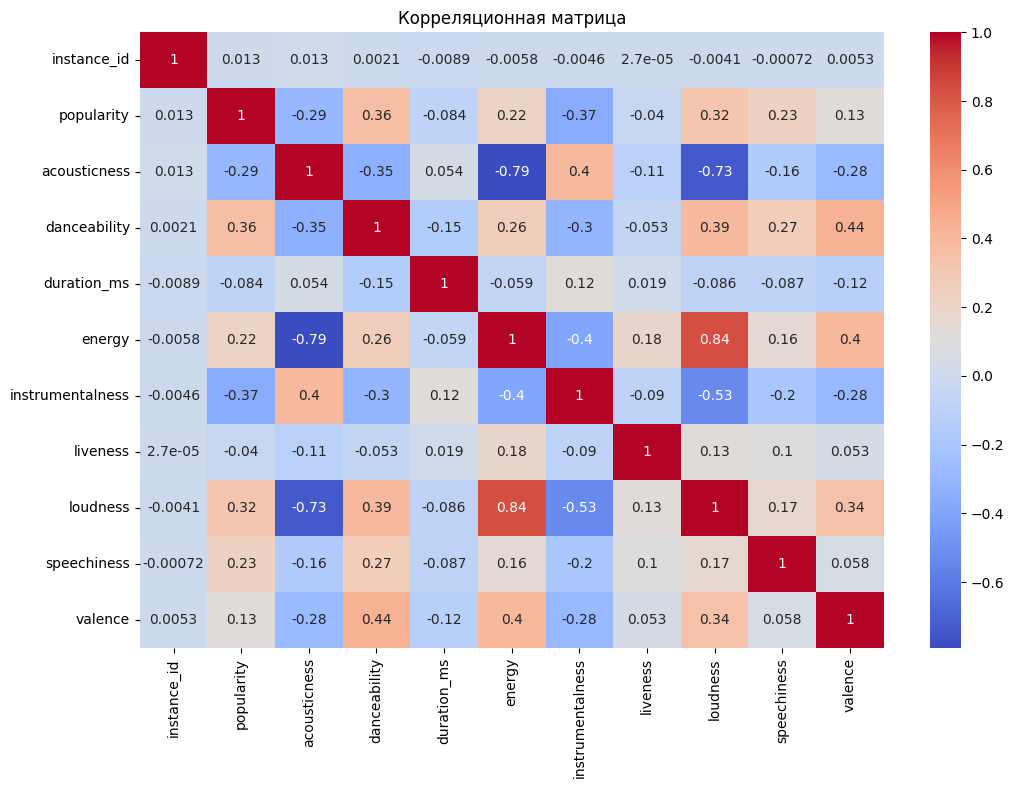

Корреляция между популярностью и длиной названия трека: -0.21706121197894387


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv('music_genre.csv')

# Удаление строк с пустыми значениями в столбце 'track_name'
df = df.dropna(subset=['track_name'])

# Выборка 20 тысяч случайных строк
df = df.sample(n=20000, random_state=42)

# Вычисление корреляционной матрицы
corr_matrix = df.corr(numeric_only=True)

# Построение тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Корреляция между популярностью и длиной названия трека
popularity_length_corr = df['popularity'].corr(df['track_name'].str.len())
print(f"Корреляция между популярностью и длиной названия трека: {popularity_length_corr}")

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

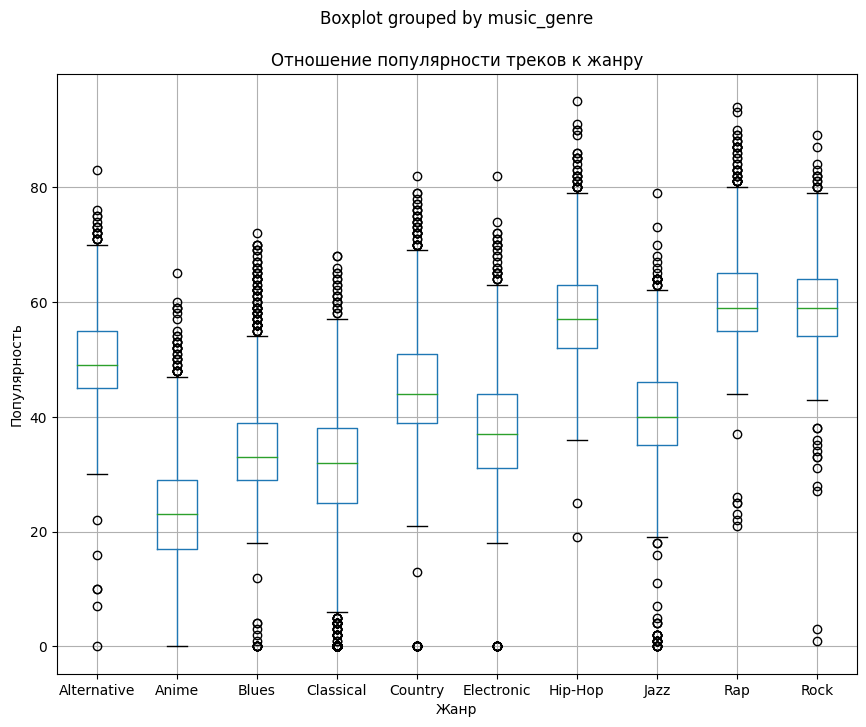

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('music_genre.csv')

# Выбор 20 тысяч случайных строк
df = df.sample(n=20000, random_state=42)

# Создание ящиковой диаграммы
df.boxplot(column='popularity', by='music_genre', figsize=(10, 8))

# Оформление графика
plt.title('Отношение популярности треков к жанру')
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.show()

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

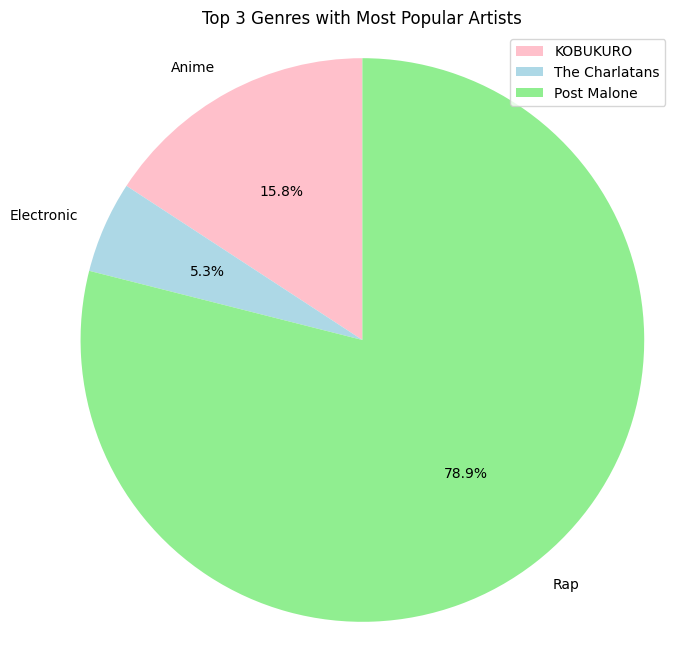

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv('music_genre.csv')

# Выборка 20 тысяч случайных строк
df = df.sample(n=20000, random_state=42)

# 1. Определение топ-3 жанров
top_genres = df['music_genre'].value_counts().head(3).index.tolist()

# 2. Определение самого популярного исполнителя для каждого из топ-3 жанров
top_artists = {}
for genre in top_genres:
    genre_df = df[df['music_genre'] == genre]
    top_artist = genre_df.groupby('artist_name')['popularity'].mean().idxmax()
    top_artists[genre] = top_artist

# 3. Создание датафрейма с данными для круговой диаграммы
pie_df = pd.DataFrame(columns=['Genre', 'Artist', 'Count'])
for genre, artist in top_artists.items():
    genre_df = df[df['music_genre'] == genre]
    artist_df = genre_df[genre_df['artist_name'] == artist]
    count = len(artist_df)
    pie_df = pie_df._append({'Genre': genre, 'Artist': artist, 'Count': count}, ignore_index=True)

# 4. Построение круговой диаграммы
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['pink','lightblue','lightgreen']
plt.pie(pie_df['Count'], labels=pie_df['Genre'], colors=colors, startangle=90, autopct='%1.1f%%')
plt.title('Top 3 Genres with Most Popular Artists')
plt.legend(pie_df['Artist'], loc='best')
plt.axis('equal')
plt.show()

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

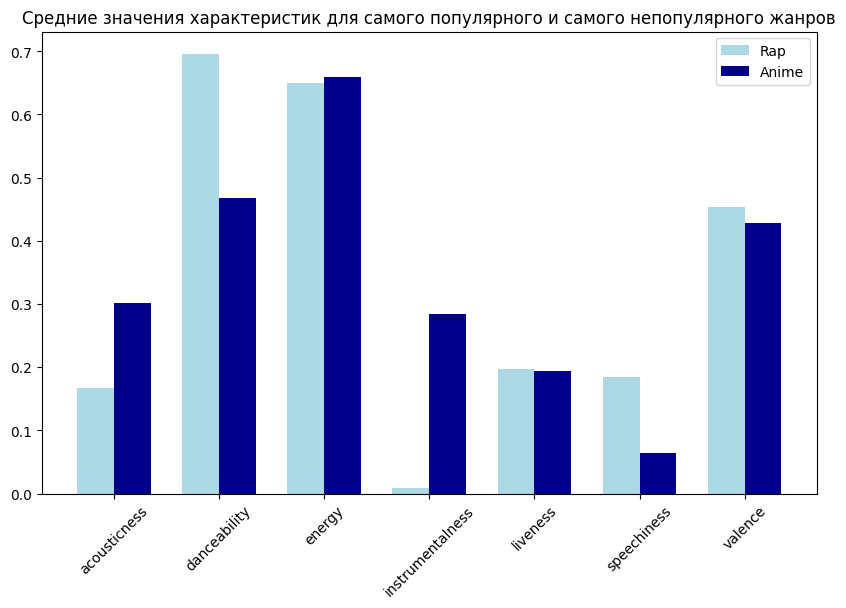

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# загрузка датасета и выбор 20 тысяч случайных строк
df = pd.read_csv('music_genre.csv').sample(n=20000, random_state=42)

# удаление дублирующихся строк
df = df.drop_duplicates()

genre_popularity = df.groupby('music_genre')['popularity'].mean().sort_values(ascending=False)
most_popular_genre = genre_popularity.index[0]
least_popular_genre = genre_popularity.index[-1]

# Средние значения по характеристикам для двух жанров
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
pop_mean = df[df['music_genre'] == most_popular_genre][features].mean()
unpop_mean = df[df['music_genre'] == least_popular_genre][features].mean()

# Отрицательные и положительные значения будут показаны разными цветами
colors = ['red' if x < 0 else 'grey' for x in np.concatenate((pop_mean.values, unpop_mean.values))]

# Столбиковая диаграмма
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(len(features))
width = 0.35
ax.bar(ind, pop_mean.values, width, color='lightblue')
ax.bar(ind + width, unpop_mean.values, width, color='darkblue')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features, rotation=45)
ax.legend([most_popular_genre, least_popular_genre])
ax.set_title('Средние значения характеристик для самого популярного и самого непопулярного жанров')
plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

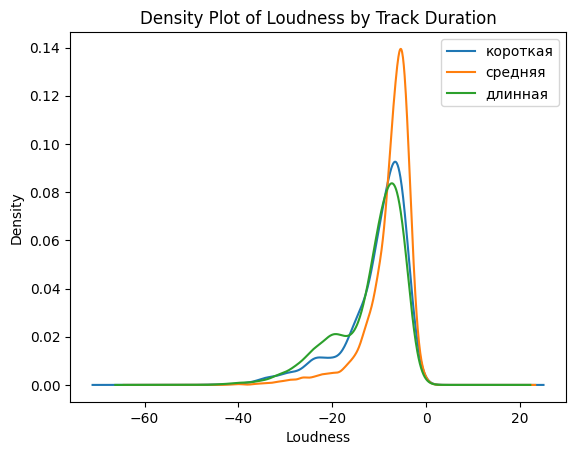

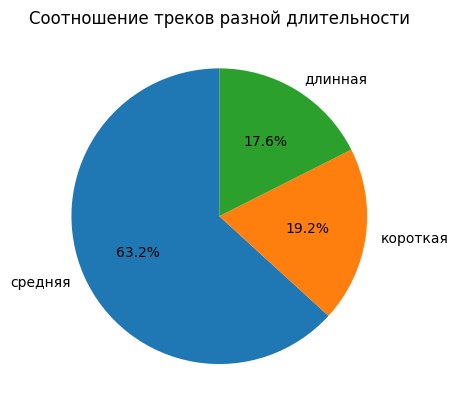

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv('music_genre.csv')

# Выборка 20 тысяч случайных строк
df = df.sample(n=20000, random_state=42)

# Добавление столбца длительности трека
bins = [0, 180, 300, float("inf")] # границы категорий в секундах
labels = ['короткая', 'средняя', 'длинная'] # названия категорий
df['длительность_трека'] = pd.cut(df['duration_ms'] / 1000, bins=bins, labels=labels)

# График плотности распределения loudness по категориям длительности трека
df.groupby('длительность_трека')['loudness'].plot(kind='density', legend=True)
plt.title('Density Plot of Loudness by Track Duration')
plt.xlabel('Loudness')
plt.show()

# Круговая диаграмма с численным соотношением треков разной длительности
df['длительность_трека'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Соотношение треков разной длительности')
plt.ylabel('')
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]